In [113]:
import pandas as pd
df = pd.read_csv(r'OneDrive\Desktop\2022Fall\DEPA Final\Traffic_Crashes_-_Crashes.csv')

In [114]:
df

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,1.0,2.0,0.0,14,2,3,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,JB422857,NaN,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,8,4,9,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,NaN,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,...,0.0,0.0,2.0,0.0,0,6,7,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d2...,JF378711,NaN,08/29/2022 11:30:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,11,2,8,41.749348,-87.721097,POINT (-87.721096727406 41.749348170421)
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,NaN,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,18,6,7,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673758,b93c225fa3fab962a186c30a442c0d581e03dbfa47cf99...,NaN,NaN,11/24/2022 04:40:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,PARKED MOTOR VEHICLE,...,0.0,0.0,4.0,0.0,16,5,11,41.821258,-87.701873,POINT (-87.701872610186 41.821258423603)
673759,58836410941fb22412eaeaf1e8111f5d3c0ab0c68fd155...,NaN,NaN,11/24/2022 03:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,15,5,11,41.686263,-87.664858,POINT (-87.664858007912 41.686263191946)
673760,8588fb5bf485485db492c6d13fc5d2ae8f722ef423e7e1...,NaN,NaN,11/24/2022 01:00:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,2.0,0.0,13,5,11,41.985267,-87.662517,POINT (-87.662516804053 41.985266769831)
673761,9ca7bae9fb525af43c3919614b5b4627fbbbcad68055e6...,NaN,NaN,11/24/2022 06:47:00 AM,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,6,5,11,41.874644,-87.629649,POINT (-87.629648503841 41.874644283241)


In [115]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, r2_score, recall_score, precision_score, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler

from sklearn.compose import ColumnTransformer

In [116]:
df.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LA

## Calculating Nulls

In [117]:
# calculating nulls
nulls = df.isna().sum()
null_percent = nulls[nulls>0] / len(df)
null_percent.to_frame('% Null').style.background_gradient(cmap='Reds')

,% Null
RD_NO,0.006072
CRASH_DATE_EST_I,0.924246
LANE_CNT,0.704651
REPORT_TYPE,0.027007
INTERSECTION_RELATED_I,0.771038
NOT_RIGHT_OF_WAY_I,0.953052
HIT_AND_RUN_I,0.690615
STREET_DIRECTION,0.000006
STREET_NAME,0.000001
BEAT_OF_OCCURRENCE,0.000007


In [118]:
# extracting columns with excessive nulls which is set at 95%
Index_label = null_percent[null_percent>.70].index.tolist()
Index_label

['CRASH_DATE_EST_I',
 'LANE_CNT',
 'INTERSECTION_RELATED_I',
 'NOT_RIGHT_OF_WAY_I',
 'PHOTOS_TAKEN_I',
 'STATEMENTS_TAKEN_I',
 'DOORING_I',
 'WORK_ZONE_I',
 'WORK_ZONE_TYPE',
 'WORKERS_PRESENT_I']

In [119]:
# drop the columns with excessive nulls
df = df.drop(columns = Index_label)
print(df.shape)
display(df.head())
df.info()

(673763, 39)


,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,0.0,1.0,2.0,0.0,14,2,3,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,JB422857,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,...,0.0,0.0,2.0,0.0,8,4,9,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,...,0.0,0.0,2.0,0.0,0,6,7,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d2...,JF378711,08/29/2022 11:30:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,...,0.0,0.0,3.0,0.0,11,2,8,41.749348,-87.721097,POINT (-87.721096727406 41.749348170421)
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,...,0.0,0.0,2.0,0.0,18,6,7,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673763 entries, 0 to 673762
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                673763 non-null  object 
 1   RD_NO                          669672 non-null  object 
 2   CRASH_DATE                     673763 non-null  object 
 3   POSTED_SPEED_LIMIT             673763 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         673763 non-null  object 
 5   DEVICE_CONDITION               673763 non-null  object 
 6   WEATHER_CONDITION              673763 non-null  object 
 7   LIGHTING_CONDITION             673763 non-null  object 
 8   FIRST_CRASH_TYPE               673763 non-null  object 
 9   TRAFFICWAY_TYPE                673763 non-null  object 
 10  ALIGNMENT                      673763 non-null  object 
 11  ROADWAY_SURFACE_COND           673763 non-null  object 
 12  ROAD_DEFECT                   

In [120]:
# dropping redundant columns, previewing shape, data and info 
drop = ['CRASH_RECORD_ID', 'RD_NO', 'ALIGNMENT', 'RD_NO', 'CRASH_DATE',
        'REPORT_TYPE','CRASH_TYPE', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', "INJURIES_NON_INCAPACITATING", 'INJURIES_REPORTED_NOT_EVIDENT', 'STREET_DIRECTION',
       'STREET_NAME', 'LOCATION', 'MOST_SEVERE_INJURY', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'INJURIES_UNKNOWN', 'INJURIES_NO_INDICATION',
       'SEC_CONTRIBUTORY_CAUSE', 'DAMAGE', 'DATE_POLICE_NOTIFIED', 'STREET_NO', 'NUM_UNITS', 'PRIM_CONTRIBUTORY_CAUSE']
df = df.drop(columns=drop)
print(df.shape)
display(df.head())
df.info()

(673763, 14)


,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,ROAD_DEFECT,HIT_AND_RUN_I,BEAT_OF_OCCURRENCE,INJURIES_TOTAL,CRASH_HOUR,CRASH_DAY_OF_WEEK
0,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,DRY,NO DEFECTS,NaN,121.0,1.0,14,2
1,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,DRY,NO DEFECTS,NaN,1712.0,0.0,8,4
2,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,DRY,UNKNOWN,NaN,1123.0,0.0,0,6
3,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,DRY,NO DEFECTS,NaN,834.0,0.0,11,2
4,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,DRY,NO DEFECTS,NaN,1811.0,0.0,18,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673763 entries, 0 to 673762
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   POSTED_SPEED_LIMIT      673763 non-null  int64  
 1   TRAFFIC_CONTROL_DEVICE  673763 non-null  object 
 2   DEVICE_CONDITION        673763 non-null  object 
 3   WEATHER_CONDITION       673763 non-null  object 
 4   LIGHTING_CONDITION      673763 non-null  object 
 5   FIRST_CRASH_TYPE        673763 non-null  object 
 6   TRAFFICWAY_TYPE         673763 non-null  object 
 7   ROADWAY_SURFACE_COND    673763 non-null  object 
 8   ROAD_DEFECT             673763 non-null  object 
 9   HIT_AND_RUN_I           208452 non-null  object 
 10  BEAT_OF_OCCURRENCE      673758 non-null  float64
 11  INJURIES_TOTAL          672310 non-null  float64
 12  CRASH_HOUR              673763 non-null  int64  
 13  CRASH_DAY_OF_WEEK       673763 non-null  int64  
dtypes: float64(2), int64

## Simplifying Categorical Columns 

In [121]:
# observing values of crash_hour
df.CRASH_HOUR.value_counts()

15    51729
16    51508
17    50253
14    45422
18    41556
13    41287
12    39878
8     35182
11    34469
9     31000
10    30746
19    30592
7     28175
20    24685
21    21981
22    20202
23    17449
6     14669
0     14436
1     12307
2     10578
5      9262
3      8642
4      7755
Name: CRASH_HOUR, dtype: int64

In [122]:
# creating bins for times 
# 0-6 = Late Night/Early Morning 
# 6-12 = Morning 
# 12-18 = Afternoon/Rush Hour
# 18-23 = Late Evening 
df['TIME_BINS'] = pd.cut(x=df['CRASH_HOUR'], bins = [0,6,12,18,23], 
                         labels = ['Late Night/Early Morning', 
                        'Morning', 'Afternoon/Rush Hour','Late Evening'])
df.head()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,ROAD_DEFECT,HIT_AND_RUN_I,BEAT_OF_OCCURRENCE,INJURIES_TOTAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,TIME_BINS
0,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,DRY,NO DEFECTS,NaN,121.0,1.0,14,2,Afternoon/Rush Hour
1,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,DRY,NO DEFECTS,NaN,1712.0,0.0,8,4,Morning
2,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,DRY,UNKNOWN,NaN,1123.0,0.0,0,6,NaN
3,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,DRY,NO DEFECTS,NaN,834.0,0.0,11,2,Morning
4,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,DRY,NO DEFECTS,NaN,1811.0,0.0,18,6,Afternoon/Rush Hour


In [123]:
df.POSTED_SPEED_LIMIT.value_counts()

30    495245
35     45572
25     42159
20     27851
15     23823
10     15340
0       7209
40      6470
45      4309
5       4304
55       667
50       167
3        162
9         94
39        71
99        66
60        41
1         38
24        35
2         24
32        17
65        15
34        13
33        12
11        11
6          7
7          5
36         5
70         4
12         3
22         3
14         3
4          2
26         2
31         2
29         2
38         2
18         2
23         1
62         1
49         1
63         1
16         1
44         1
Name: POSTED_SPEED_LIMIT, dtype: int64

In [124]:
# creating bins and label, previewing data 
df['POST_SPEED'] = pd.cut(x=df['POSTED_SPEED_LIMIT'], bins = [0,15,25,40,75], 
                         labels = ['0-15', '16-25', 
                        '26-40', '41+'])
df.head()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,ROAD_DEFECT,HIT_AND_RUN_I,BEAT_OF_OCCURRENCE,INJURIES_TOTAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,TIME_BINS,POST_SPEED
0,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,DRY,NO DEFECTS,NaN,121.0,1.0,14,2,Afternoon/Rush Hour,26-40
1,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,DRY,NO DEFECTS,NaN,1712.0,0.0,8,4,Morning,26-40
2,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,DRY,UNKNOWN,NaN,1123.0,0.0,0,6,NaN,26-40
3,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,DRY,NO DEFECTS,NaN,834.0,0.0,11,2,Morning,26-40
4,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,DRY,NO DEFECTS,NaN,1811.0,0.0,18,6,Afternoon/Rush Hour,26-40


In [125]:
df.TRAFFIC_CONTROL_DEVICE.value_counts()

NO CONTROLS                 386792
TRAFFIC SIGNAL              186712
STOP SIGN/FLASHER            66877
UNKNOWN                      23483
OTHER                         4353
LANE USE MARKING              1226
YIELD                          942
OTHER REG. SIGN                707
OTHER WARNING SIGN             576
RAILROAD CROSSING GATE         433
PEDESTRIAN CROSSING SIGN       374
DELINEATORS                    257
SCHOOL ZONE                    253
POLICE/FLAGMAN                 241
FLASHING CONTROL SIGNAL        235
OTHER RAILROAD CROSSING        158
RR CROSSING SIGN                87
NO PASSING                      38
BICYCLE CROSSING SIGN           19
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64

In [126]:
traffic_control_map = {'NO CONTROLS': 'NO CONTROLS',
                      'TRAFFIC SIGNAL': 'TRAFFIC SIGNAL/SIGN',
                      'STOP SIGN/FLASHER': 'TRAFFIC SIGNAL/SIGN',
                      'UNKNOWN': 'UNKNOWN/OTHER',
                      'OTHER': 'UNKNOWN/OTHER',
                      'YIELD': 'UNKNOWN/OTHER',
                      'LANE USE MARKING' : 'UNKNOWN/OTHER',
                      'OTHER REG. SIGN' : 'UNKNOWN/OTHER',
                      'OTHER WARNING SIGN' : 'UNKNOWN/OTHER',
                      'RAILROAD CROSSING GATE' : 'UNKNOWN/OTHER',
                      'PEDESTRIAN CROSSING SIGN' : 'PEDESTRIAN CROSSING SIGN',
                      'DELINEATORS' : 'DELINEATORS',
                      'POLICE/FLAGMAN' : 'POLICE/FLAGMAN',
                      'FLASHING CONTROL SIGNAL' : 'FLASHING CONTROL SIGNAL',
                      'OTHER RAILROAD CROSSING' : 'UNKNOWN/OTHER',
                      'RR CROSSING SIGN ' : 'RR CROSSING SIGN ',
                      'NO PASSING' : 'NO PASSING',
                      'BICYCLE CROSSING SIGN' : 'BICYCLE CROSSING SIGN',
                      }

df.TRAFFIC_CONTROL_DEVICE = df.TRAFFIC_CONTROL_DEVICE.map(traffic_control_map)
df.TRAFFIC_CONTROL_DEVICE.value_counts()

NO CONTROLS                 386792
TRAFFIC SIGNAL/SIGN         253589
UNKNOWN/OTHER                31878
PEDESTRIAN CROSSING SIGN       374
DELINEATORS                    257
POLICE/FLAGMAN                 241
FLASHING CONTROL SIGNAL        235
NO PASSING                      38
BICYCLE CROSSING SIGN           19
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64

In [127]:
df.DEVICE_CONDITION.value_counts()

NO CONTROLS                 391248
FUNCTIONING PROPERLY        232083
UNKNOWN                      39495
OTHER                         5217
FUNCTIONING IMPROPERLY        3283
NOT FUNCTIONING               2102
WORN REFLECTIVE MATERIAL       255
MISSING                         80
Name: DEVICE_CONDITION, dtype: int64

In [128]:
# defining dictionary map and remapping
device_map = {'NO CONTROLS': 'NO CONTROLS',
            'FUNCTIONING PROPERLY': 'FUNCTIONING PROPERLY',
            'UNKNOWN': 'NOT FUNCTIONING/UNKNOWN',
            'OTHER': 'NOT FUNCTIONING/UNKNOWN',
            'FUNCTIONING IMPROPERLY': 'NOT FUNCTIONING/UNKNOWN',
            'NOT FUNCTIONING': 'NOT FUNCTIONING/UNKNOWN',
            'WORN REFLECTIVE MATERIAL': 'NOT FUNCTIONING/UNKNOWN',
            'MISSING': 'NOT FUNCTIONING/UNKNOWN',
             }

df.DEVICE_CONDITION = df.DEVICE_CONDITION.map(device_map)
df.DEVICE_CONDITION.value_counts()

NO CONTROLS                391248
FUNCTIONING PROPERLY       232083
NOT FUNCTIONING/UNKNOWN     50432
Name: DEVICE_CONDITION, dtype: int64

In [129]:
df.WEATHER_CONDITION.value_counts()

CLEAR                       534111
RAIN                         58088
UNKNOWN                      32738
SNOW                         23843
CLOUDY/OVERCAST              19597
OTHER                         2084
FREEZING RAIN/DRIZZLE         1074
FOG/SMOKE/HAZE                 961
SLEET/HAIL                     836
BLOWING SNOW                   290
SEVERE CROSS WIND GATE         137
BLOWING SAND, SOIL, DIRT         4
Name: WEATHER_CONDITION, dtype: int64

In [130]:
# defining dictionary map and remapping
weather_map = {'CLEAR': 'CLEAR',
                'RAIN': 'RAIN/CLOUDY/OTHER',
                'CLOUDY/OVERCAST': 'RAIN/CLOUDY/OTHER',
                'UNKNOWN': 'RAIN/CLOUDY/OTHER',
                'OTHER': 'RAIN/CLOUDY/OTHER',
                'SNOW': 'SNOW',
                'FREEZING RAIN/DRIZZLE ': 'RAIN/CLOUDY/OTHER',
                'BLOWING SNOW': 'SNOW',
                'FOG/SMOKE/HAZE': 'FOG/SMOKE/HAZE',
                'SEVERE CROSS WIND GATE ': 'SEVERE CROSS WIND GATE',
                'BLOWING SAND, SOIL, DIRT': 'BLOWING SAND, SOIL, DIRT'
              }

df.WEATHER_CONDITION = df.WEATHER_CONDITION.map(weather_map)
df.WEATHER_CONDITION.value_counts()

CLEAR                       534111
RAIN/CLOUDY/OTHER           112507
SNOW                         24133
FOG/SMOKE/HAZE                 961
BLOWING SAND, SOIL, DIRT         4
Name: WEATHER_CONDITION, dtype: int64

In [131]:
df.FIRST_CRASH_TYPE.value_counts()

PARKED MOTOR VEHICLE            157176
REAR END                        154007
SIDESWIPE SAME DIRECTION        102486
TURNING                          95194
ANGLE                            72491
FIXED OBJECT                     31746
PEDESTRIAN                       15355
PEDALCYCLIST                     10065
SIDESWIPE OPPOSITE DIRECTION      9635
OTHER OBJECT                      6676
HEAD ON                           5749
REAR TO FRONT                     5580
REAR TO SIDE                      3304
OTHER NONCOLLISION                2185
REAR TO REAR                      1192
ANIMAL                             471
OVERTURNED                         412
TRAIN                               39
Name: FIRST_CRASH_TYPE, dtype: int64

In [132]:
# defining dictionary map and remapping
crash_map = {'PEDESTRIAN': 'PED/CYCLIST',
                'PEDALCYCLIST': 'PED/CYCLIST',
                'REAR END': 'REAR END',
                'SIDESWIPE SAME DIRECTION': 'SIDESWIPE',
                'TURNING': 'TURNING/ANGLE',
                'ANGLE': 'TURNING/ANGLE',
                'PARKED MOTOR VEHICLE': 'PARKED/FIXED',
                'FIXED OBJECT': 'PARKED/FIXED',
                'REAR TO SIDE': 'OTHER',
                'SIDESWIPE OPPOSITE DIRECTION ': 'SIDESWIPE',
                'HEAD ON': 'OTHER',
                'OTHER OBJECT': 'OTHER',
                'REAR TO REAR': 'OTHER',
                'OTHER NONCOLLISION': 'OTHER',
                'TRAIN': 'TRAIN',
                'REAR TO FRONT': 'OTHER',
                'ANIMAL': 'OTHER',
                'OVERTURNED': 'OTHER',
                }

df.FIRST_CRASH_TYPE = df.FIRST_CRASH_TYPE.map(crash_map)
df.FIRST_CRASH_TYPE.value_counts()

PARKED/FIXED     188922
TURNING/ANGLE    167685
REAR END         154007
SIDESWIPE        102486
OTHER             25569
PED/CYCLIST       25420
TRAIN                39
Name: FIRST_CRASH_TYPE, dtype: int64

In [133]:
df.TRAFFICWAY_TYPE.value_counts()

NOT DIVIDED                        296787
DIVIDED - W/MEDIAN (NOT RAISED)    111919
ONE-WAY                             87597
PARKING LOT                         46493
DIVIDED - W/MEDIAN BARRIER          39338
FOUR WAY                            33634
OTHER                               18553
ALLEY                               11055
UNKNOWN                              7396
T-INTERSECTION                       6991
CENTER TURN LANE                     5105
DRIVEWAY                             2226
RAMP                                 2106
UNKNOWN INTERSECTION TYPE            1759
Y-INTERSECTION                        767
FIVE POINT, OR MORE                   766
TRAFFIC ROUTE                         618
NOT REPORTED                          352
ROUNDABOUT                            181
L-INTERSECTION                        120
Name: TRAFFICWAY_TYPE, dtype: int64

In [134]:
# defining dictionary map and remapping
traffic_map = {'NOT DIVIDED': 'NOT DIVIDED',
                'DIVIDED - W/MEDIAN (NOT RAISED)': 'DIVIDED',
                'ONE-WAY': 'ONE-WAY',
                'FOUR WAY': 'FOUR WAY',
                'PARKING LOT': 'PARKING LOT',
                'DIVIDED - W/MEDIAN BARRIER': 'DIVIDED',
                'ALLEY': 'ALLEY/OTHER',
                'OTHER': 'ALLEY/OTHER',
                'CENTER TURN LANE': 'ALLEY/OTHER',
                'Y-INTERSECTION': 'ALLEY/OTHER',
                'T-INTERSECTION': 'ALLEY/OTHER',
                'UNKNOWN': 'UNKNOWN',
                'NOT REPORTED': 'UNKNOWN',
                'DRIVEWAY': 'DRIVEWAY',
                'RAMP': 'RAMP',
                'UNKNOWN INTERSECTION TYPE': 'UNKNOWN',
                'ROUNDABOUT': 'ROUNDABOUT',
                'L-INTERSECTION': 'ALLEY/OTHER',
                'TRAFFIC ROUTE': 'TRAFFIC ROUTE'
              }

df.TRAFFICWAY_TYPE = df.TRAFFICWAY_TYPE.map(traffic_map)
df.TRAFFICWAY_TYPE.value_counts()

NOT DIVIDED      296787
DIVIDED          151257
ONE-WAY           87597
PARKING LOT       46493
ALLEY/OTHER       42591
FOUR WAY          33634
UNKNOWN            9507
DRIVEWAY           2226
RAMP               2106
TRAFFIC ROUTE       618
ROUNDABOUT          181
Name: TRAFFICWAY_TYPE, dtype: int64

In [135]:
df.ROAD_DEFECT.value_counts()

NO DEFECTS           551858
UNKNOWN              107998
RUT, HOLES             5493
OTHER                  3761
WORN SURFACE           2789
SHOULDER DEFECT        1327
DEBRIS ON ROADWAY       537
Name: ROAD_DEFECT, dtype: int64

In [136]:
# defining dictionary map and remapping
defect_map = {'NO DEFECTS': 'NO DEFECTS',
             'UNKNOWN': 'UNKNOWN/OTHER',
             'OTHER': 'UNKNOWN/OTHER',
             'SHOULDER DEFECT': 'UNKNOWN/OTHER',
             'RUT, HOLES': 'RUT, HOLES',
             'WORN SURFACE': 'WORN SURFACE',
             'DEBRIS ON ROADWAY': 'DEBRIS ON ROADWAY'
             }

df.ROAD_DEFECT = df.ROAD_DEFECT.map(defect_map)
df.ROAD_DEFECT.value_counts()

NO DEFECTS           551858
UNKNOWN/OTHER        113086
RUT, HOLES             5493
WORN SURFACE           2789
DEBRIS ON ROADWAY       537
Name: ROAD_DEFECT, dtype: int64

In [137]:
df.ROADWAY_SURFACE_COND.value_counts()

DRY                503843
WET                 88492
UNKNOWN             50389
SNOW OR SLUSH       24288
ICE                  4831
OTHER                1656
SAND, MUD, DIRT       264
Name: ROADWAY_SURFACE_COND, dtype: int64

In [138]:
# defining dictionary map and remapping
defect_map = {'DRY': 'DRY',
             'WET': 'WET',
             'SNOW OR SLUSH': 'SNOW OR SLUSH',
             'UNKNOWN': 'UNKNOWN/OTHER',
             'ICE': 'RUT, HOLES',
             'OTHER': 'UNKNOWN/OTHER',
             'SAND, MUD, DIRT': 'SAND, MUD, DIRT'
             }

df.ROADWAY_SURFACE_COND = df.ROADWAY_SURFACE_COND.map(defect_map)
df.ROADWAY_SURFACE_COND.value_counts()

DRY                503843
WET                 88492
UNKNOWN/OTHER       52045
SNOW OR SLUSH       24288
RUT, HOLES           4831
SAND, MUD, DIRT       264
Name: ROADWAY_SURFACE_COND, dtype: int64

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673763 entries, 0 to 673762
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   POSTED_SPEED_LIMIT      673763 non-null  int64   
 1   TRAFFIC_CONTROL_DEVICE  673423 non-null  object  
 2   DEVICE_CONDITION        673763 non-null  object  
 3   WEATHER_CONDITION       671716 non-null  object  
 4   LIGHTING_CONDITION      673763 non-null  object  
 5   FIRST_CRASH_TYPE        664128 non-null  object  
 6   TRAFFICWAY_TYPE         672997 non-null  object  
 7   ROADWAY_SURFACE_COND    673763 non-null  object  
 8   ROAD_DEFECT             673763 non-null  object  
 9   HIT_AND_RUN_I           208452 non-null  object  
 10  BEAT_OF_OCCURRENCE      673758 non-null  float64 
 11  INJURIES_TOTAL          672310 non-null  float64 
 12  CRASH_HOUR              673763 non-null  int64   
 13  CRASH_DAY_OF_WEEK       673763 non-null  int64   
 14  TIME

In [140]:
# creating classes: 0 = not injured, 1 = injured
df['INJURIES_TOTAL'] = df['INJURIES_TOTAL'].map(lambda x: 1 if x > 0 else 0)

# renaming column 
df.rename(columns = {'INJURIES_TOTAL':'INJURED'}, inplace = True) 

# reviewing classification 
df.INJURED.value_counts()

0    582943
1     90820
Name: INJURED, dtype: int64

In [144]:
#dropping following columns because we created bins 
drop = ['POSTED_SPEED_LIMIT', 'CRASH_HOUR']
df = df.drop(columns=drop)


# converting columns to appropriate data types 
df['BEAT_OF_OCCURRENCE'] = df['BEAT_OF_OCCURRENCE'].astype(str)
df['CRASH_DAY_OF_WEEK'] = df['CRASH_DAY_OF_WEEK'].astype(str)
df['INJURED'] = df['INJURED'].astype(str)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673763 entries, 0 to 673762
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   TRAFFIC_CONTROL_DEVICE  673423 non-null  object  
 1   DEVICE_CONDITION        673763 non-null  object  
 2   WEATHER_CONDITION       671716 non-null  object  
 3   LIGHTING_CONDITION      673763 non-null  object  
 4   FIRST_CRASH_TYPE        664128 non-null  object  
 5   TRAFFICWAY_TYPE         672997 non-null  object  
 6   ROADWAY_SURFACE_COND    673763 non-null  object  
 7   ROAD_DEFECT             673763 non-null  object  
 8   HIT_AND_RUN_I           208452 non-null  object  
 9   BEAT_OF_OCCURRENCE      673763 non-null  object  
 10  INJURED                 673763 non-null  object  
 11  CRASH_DAY_OF_WEEK       673763 non-null  object  
 12  TIME_BINS               659327 non-null  category
 13  POST_SPEED              666488 non-null  category
dtypes: c

## EDA

<AxesSubplot:xlabel='CRASH_DAY_OF_WEEK', ylabel='count'>

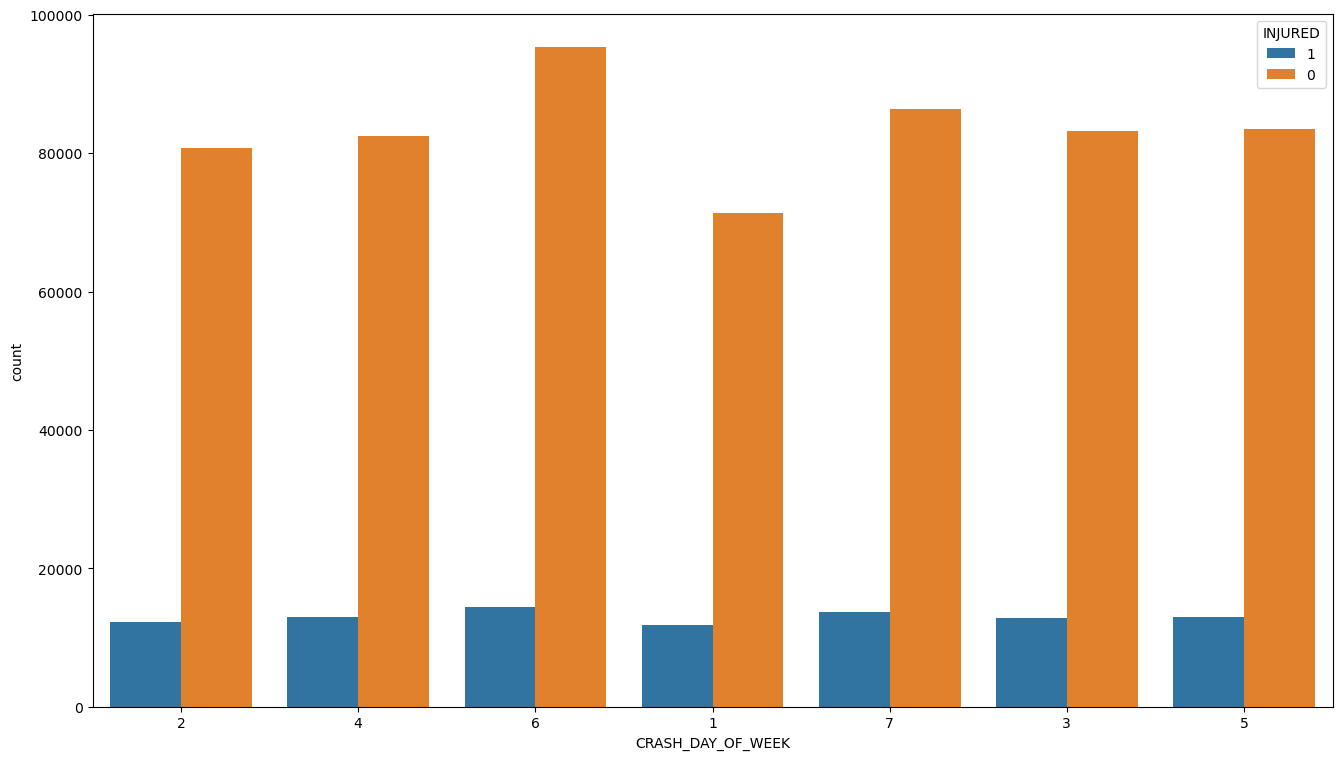

In [148]:
plt.figure(figsize=(16,9))
sns.countplot(x="CRASH_DAY_OF_WEEK", hue="INJURED", data=df)

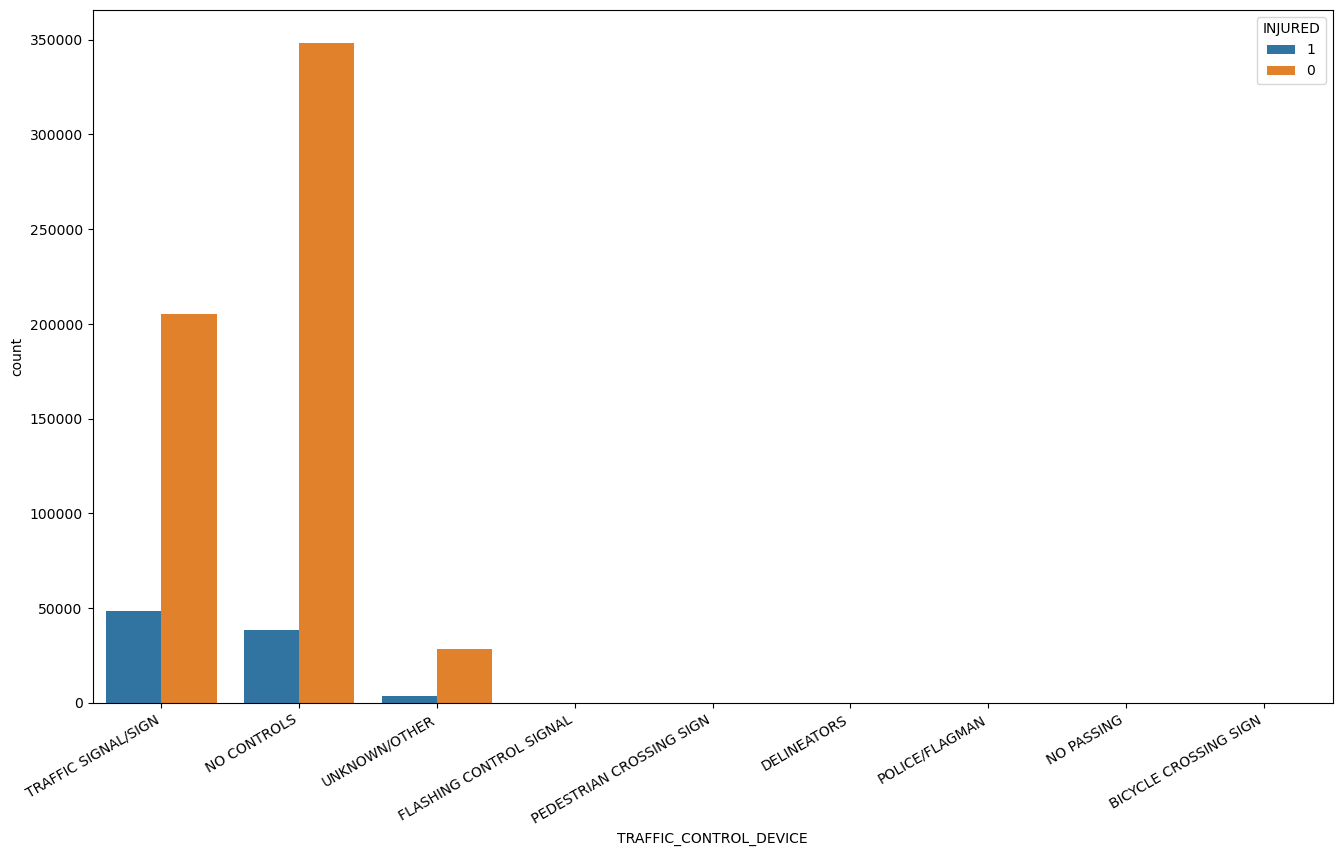

In [153]:
plt.figure(figsize=(16,9))
ax = sns.countplot(x="TRAFFIC_CONTROL_DEVICE", hue="INJURED", data=df)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

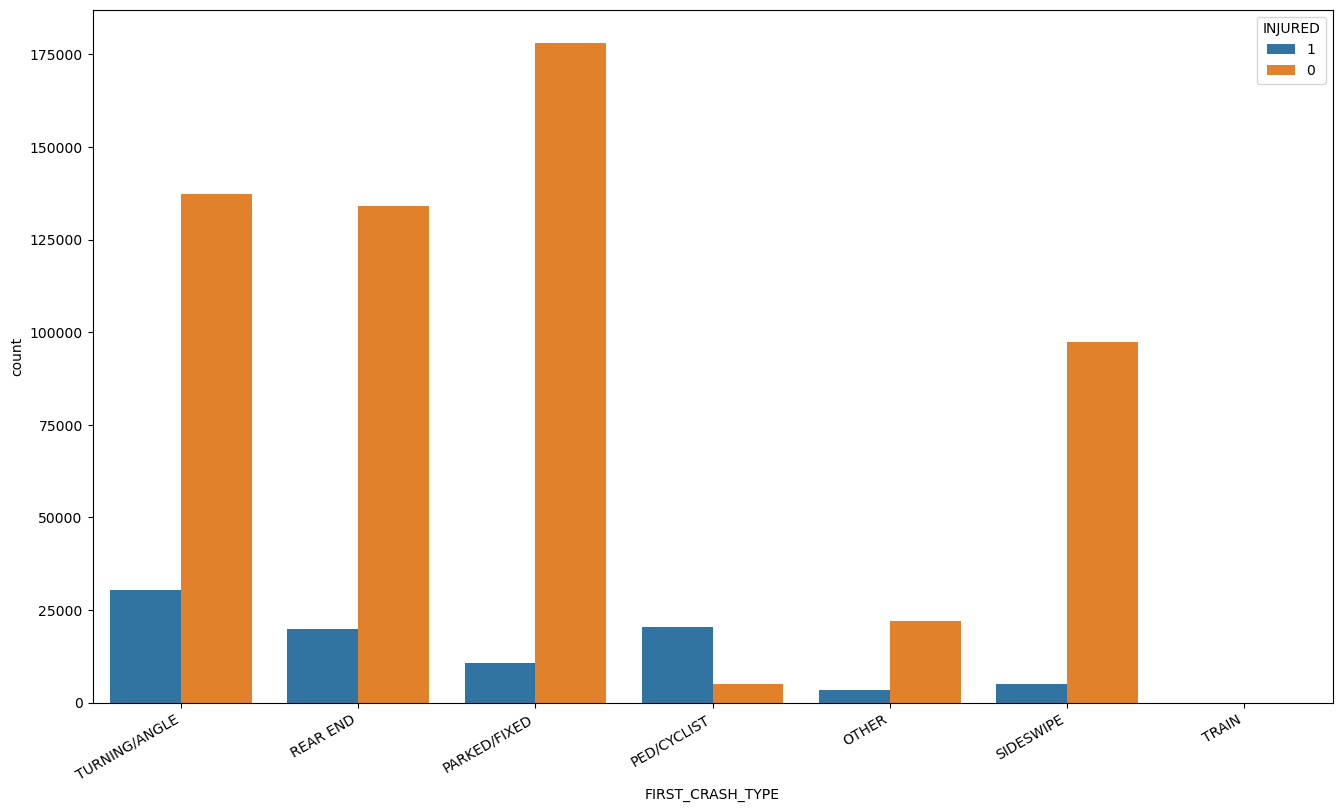

In [155]:
plt.figure(figsize=(16,9))
ax = sns.countplot(x="FIRST_CRASH_TYPE", hue="INJURED", data=df)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

<AxesSubplot:xlabel='TIME_BINS', ylabel='count'>

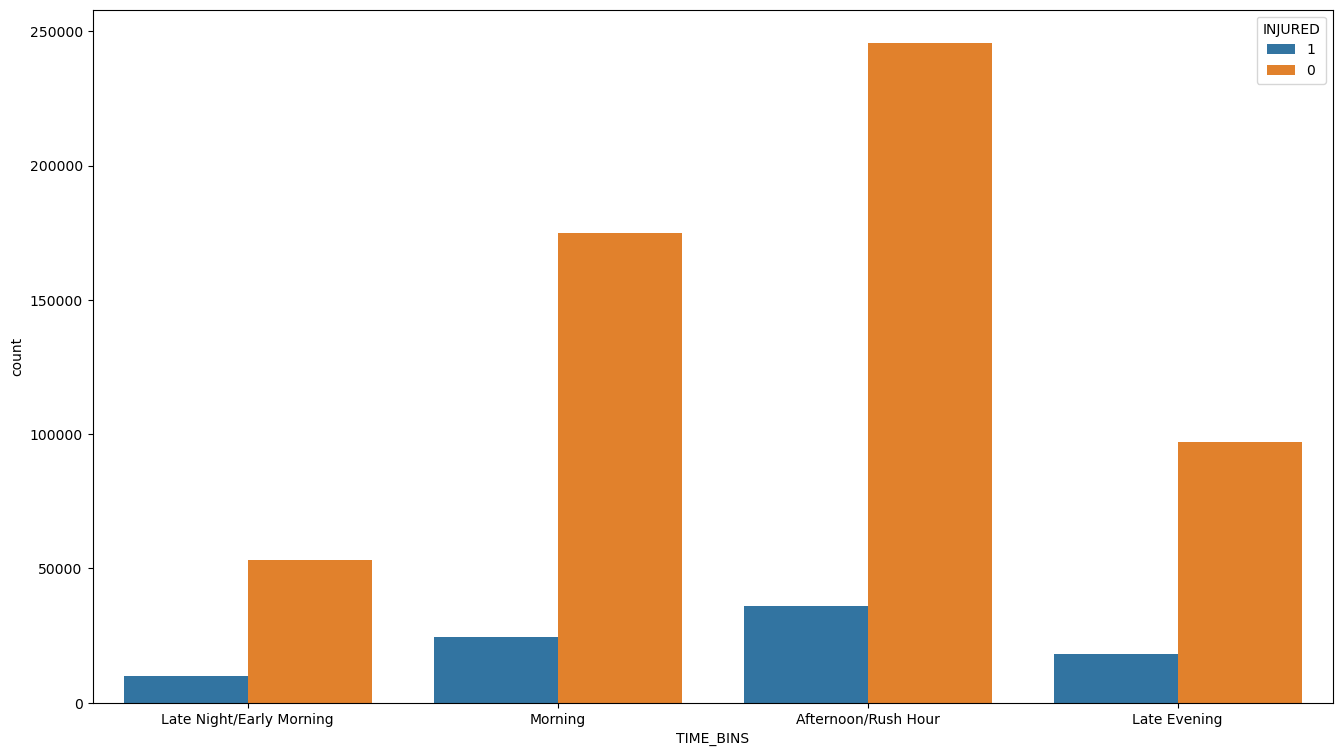

In [156]:
plt.figure(figsize=(16,9))
sns.countplot(x="TIME_BINS", hue="INJURED", data=df)